# Part 1- Exploratory Analysis

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
df_2016 = pd.read_table("/Users/johnburzawa/Downloads/DSI-Cluster-Movement-Analysis/2016_data.tsv") #Use your file path here
df_2020 = pd.read_table("/Users/johnburzawa/Downloads/DSI-Cluster-Movement-Analysis/2020_data.tsv") #Use your file path here

/var/folders/3c/s8p5wvy902gfgnq64pms18vm0000gn/T/ipykernel_26218/397125024.py:2: DtypeWarning: Columns (11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_table("/Users/johnburzawa/Downloads/DSI-Cluster-Movement-Analysis/2020_data.tsv") #Use your file path here


## Cleaning the 2020 DataFrame

In [15]:
# Changing Column Names - Dictionary Method

varcodes20 = ["V201124", "V201127", "V201130", "V201133", "V201136", "V201139", "V201142", "V202161","V202164","V201018","V202233","V202380X","V201103","V202110X","V202361X"]

varlabels20 = ["apcongress", "appres", "apeconomy", "apforeign", "aphealth", "apimmigration", "apcovid", "FTlib","FTcon","partyid","immigration","health_ins", "vote_2016","vote","free_trade"]

varmap20 = {varcodes20[i]: varlabels20[i] for i in range(len(varcodes20))}

In [16]:
#Cleaning misc variables and recoding them
df_2020.rename(columns = varmap20, inplace=True)
df_2020.loc[df_2020['vote'] == 2, 'vote'] = 0 
df_2020 = df_2020.query("vote>=0")
df_2020 = df_2020.query("vote<=1")
df_2020.loc[df_2020['partyid'] == 2, 'partyid'] = 0
df_2020 = df_2020.query("partyid >= 0")
df_2020 = df_2020.query("partyid < 3")
df_2020 = df_2020.query("FTlib > 0")
df_2020 = df_2020.query("FTlib > 0")
df_2020 = df_2020.query("FTcon < 101")
df_2020 = df_2020.query("FTcon < 101")
df_2020 = df_2020.query("immigration<50")
df_2020 = df_2020.query("immigration>0")
df_2020 = df_2020.query("health_ins>0")
df_2020 = df_2020.query("health_ins<50")
df_2020 = df_2020.query("free_trade>0")
df_2020.loc[df_2020['free_trade'] == 1, 'free_trade'] = 3
df_2020.loc[df_2020['free_trade'] == 3, 'free_trade'] = 1
df_2020.loc[df_2020['free_trade'] == 4, 'free_trade'] = 0
df_2020.loc[df_2020['free_trade'] == 5, 'free_trade'] = -1
df_2020.loc[df_2020['free_trade'] == 6, 'free_trade'] = -2
df_2020.loc[df_2020['free_trade'] == 7, 'free_trade'] = -3
df_2020.loc[df_2020['health_ins'] == 1, 'health_ins'] = 3
df_2020.loc[df_2020['health_ins'] == 3, 'health_ins'] = 1
df_2020.loc[df_2020['health_ins'] == 4, 'health_ins'] = 0
df_2020.loc[df_2020['health_ins'] == 5, 'health_ins'] = -1
df_2020.loc[df_2020['health_ins'] == 6, 'health_ins'] = -2
df_2020.loc[df_2020['health_ins'] == 7, 'health_ins'] = -3

In [17]:
#Cleaning approaval variables
approval_variables = ["apcongress", "appres", "apeconomy", "apforeign", "aphealth", "apimmigration", "apcovid"]
for var_i in approval_variables:
    df_2020.loc[df_2020[var_i] == 2, var_i] = 0
    df_2020.drop(df_2020[df_2020[var_i] < 0].index, inplace = True)

### Feeling Thermometers 2020

In [18]:
fig = px.scatter(
    df_2020,
    x="FTlib",
    y="FTcon",
    title= "Liberal vs Conservative Feeling Thermometers, 2020", 
    color = "partyid",
    color_continuous_scale=["red","blue"],
    labels = {"partyid":"Political Party","FTcon": "Feeling Thermometer: Conservatives", "FTlib": "Feeling Thermometer: Liberals"}
)
fig.show()

Figures 1 and 2 chart “feeling thermometers” of survey respondents toward liberals and conservatives according to party affiliation. Feeling thermometer scores range from 0-100, with higher ratings indicative of more amicable feelings. In 2016, the respondents were prompted to input a number within their range as their response, whereas in 2020, feeling thermometer scores fall in multiples of 5. As you would expect, in both years, democrat-identifying respondents feel more “warmly” toward liberals, and less so toward conservatives. By contrast, republican-identifying respondents most often indicated preference for conservatives as opposed to liberals. Note that these two groups are not mutually exclusive, as respondents are free to assign warm values to both parties. As one would expect, however, this is not how most people chose to respond. 

## Cleaning the 2016 DataFrame

In [19]:
# Changing Column Names - Dictionary Method

varcodes16 = ["V161080", "V161082", "V161083", "V161084", "V161085", "V162097","V162101","V161019","V162158","V162193X","V162062X","V162176X"]
varlabels16 = ["apcongress", "appres", "apeconomy", "apforeign", "aphealth", "FTlib","FTcon","partyid","immigration","health_ins","vote","free_trade"]

varmap16 = {varcodes16[i]: varlabels16[i] for i in range(len(varcodes16))}

In [20]:
#Recoding, Renaming, and Cleaning
df_2016.rename(columns = varmap16, inplace=True)
df_2016.loc[df_2016['vote'] == 2, 'vote'] = 0 #Donald Trump is coded as 2
df_2016.loc[df_2016['partyid'] == 2, 'partyid'] = 0
df_2016 = df_2016.query("vote>=0")
df_2016 = df_2016.query("vote<=1")
df_2016 = df_2016.query("FTlib > 0")
df_2016 = df_2016.query("FTcon > 0")
df_2016 = df_2016.query("immigration<50")
df_2016 = df_2016.query("immigration>0")
df_2016 = df_2016.query("health_ins>0")
df_2016 = df_2016.query("health_ins<50")
df_2016 = df_2016.query("partyid >= 0")
df_2016 = df_2016.query("partyid < 3")
df_2016 = df_2016.query("free_trade>0")
df_2016.loc[df_2016['free_trade'] == 1, 'free_trade'] = 3
df_2016.loc[df_2016['free_trade'] == 3, 'free_trade'] = 1
df_2016.loc[df_2016['free_trade'] == 4, 'free_trade'] = 0
df_2016.loc[df_2016['free_trade'] == 5, 'free_trade'] = -1
df_2016.loc[df_2016['free_trade'] == 6, 'free_trade'] = -2
df_2016.loc[df_2016['free_trade'] == 7, 'free_trade'] = -3
df_2016.loc[df_2016['health_ins'] == 1, 'health_ins'] = 3
df_2016.loc[df_2016['health_ins'] == 3, 'health_ins'] = 1
df_2016.loc[df_2016['health_ins'] == 4, 'health_ins'] = 0
df_2016.loc[df_2016['health_ins'] == 5, 'health_ins'] = -1
df_2016.loc[df_2016['health_ins'] == 6, 'health_ins'] = -2
df_2016.loc[df_2016['health_ins'] == 7, 'health_ins'] = -3

In [21]:
#cleaning approval vars
approval_variables = ["apcongress", "appres", "apeconomy", "apforeign", "aphealth"]
for var_i in approval_variables:
    df_2016.loc[df_2016[var_i] == 2, var_i] = 0
    df_2016.drop(df_2016[df_2016[var_i] < 0].index, inplace = True)

### Feeling Thermometers 2016

In [22]:
fig = px.scatter(
    df_2016,
    x="FTlib",
    y="FTcon",
    title= "Liberal vs Conservative Feeling Thermometers, 2016",
    color = "partyid",
    color_continuous_scale=["red","blue"],
    labels = {"partyid":"Political Party","FTcon": "Feeling Thermometer: Conservatives", "FTlib": "Feeling Thermometer: Liberals"}

)
fig.show()

If between 2016 and 2020, the feeling thermometers shift substantially away from one another, then it may indicate that polarization has generally increased. If the points moved closer, it may indicate a reduction of polarization. Unfortunately, due to the shift in scale from continuous in 2016 to ordinal multiples of 5 in 2020, these feeling thermometers were unable to serve the purpose we had hoped in being able to visualize polarization on political party, as there is no clear difference between the two election year surveys. 

# Supervised Learning to Predict Vote in 2016

This project utilizes a supervised machine learning model to predict voter outcomes. Supervised machine learning describes one method of predictive analytics, a subfield of data science which aims to leverage statistical modeling for the purpose of making predictions, usually informed by some empirical intuition. Supervised machine learning models utilize a labeled dataset, in which observations have some set of known features. For example, the ANES dataset used for this project (both in 2016 and in 2020) contains information on how voters answered questions in the survey, such as “for whom did you vote for president?” This survey data has “labels” or distinct outcomes which can be used for prediction. For the sake of simplicity, our analysis only looks at whether someone voted for the Democrat or the Republican candidate in both 2016 and 2020. 

The process of machine learning aims to predict future outcomes using an algorithm which is optimized based on statistical inference. For our case, we aim to predict who Americans will vote for on election day based on their responses to a variety of political questions asked in both of the ANES datasets. In our first model, we used party affiliation (which in this case we only looked at democrats and republicans), as well as approval variables for political outcomes, which take on a value of 1 if the respondent indicates they approve, and 0 if they do not. These particular values include whether or not a respondent approves of “congress handling their job,” “the president handling their job,” “the president’s handling of the economy,” “the president’s handling of foreign relations,” and “the president’s handling of health care.” These questions were selected because they were worded consistently in both 2016 and 2020, and appear to capture some breadth in different policy areas. 



In [23]:
#Select Features from Data
xvars = [
    "apcongress", 
    "appres", 
    "apeconomy", 
    "apforeign", 
    "aphealth",
    "partyid"]

yvar = "vote"

In [24]:
df_2016[xvars].describe()

apcongress      appres   apeconomy   apforeign    aphealth     partyid
count  938.000000  938.000000  938.000000  938.000000  938.000000  938.000000
mean     0.198294    0.559701    0.561834    0.542644    0.480810    0.594883
std      0.398928    0.496688    0.496427    0.498444    0.499898    0.491177
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
50%      0.000000    1.000000    1.000000    1.000000    0.000000    1.000000
75%      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [25]:
df_2016[yvar].describe()

count    938.000000
mean       0.567164
std        0.495733
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: vote, dtype: float64

In [26]:
#Train_Test_Split and Confusion Matrix Label Dictionaries
[df_2016_train, df_2016_test] = train_test_split(df_2016, train_size = 0.9)
[df_2020_train, df_2020_test] = train_test_split(df_2020, train_size = 0.9)
cmlabels16= {0:"Donald Tump",1:"Hillary Clinton"}
cmlabels20= {0:"Donald Trump",1:"Joe Biden"}


Two common models were tested to determine which would be a better predictive tool given our data- the logistic regression model and the random forest classifier. Both models are often used to make predictions for what’s known as a classification problem. Classification problems can be thought of in terms of those questions which have a finite set of answers, whereas regression problems have a continuous outcome the model attempts to predict. Since we aim to assess which of two options an individual voted for, we utilize a random forest classifier and a logistic regression (which, although it has regression in the name, is confusingly a classification tool). The logistic regression model looks at the probability of one observation being classified in a certain way by trying to fit an s-shaped sigmoid function based on the features of the data. This algorithm is one of the most used for classification problems. However, it tends to work better using features which are continuous. In the case of our survey data, we have many categorical features which are better suited for the random forest. The random forest is a type of ensemble method (meaning a combination of several algorithms) which makes predictions through a random subset of the data, fitting several decision trees based on a random selection of variables, which aims to prevent the overfitting problem of traditional decision trees. Each “tree” is comprised of thresholds at which certain distinctions within the data are made based on if a value is less than, greater than, or equal to a juncture value. 

We estimate a model for 2016, which is optimized or “trained” based on a random sample containing 90% of the full ANES 2016 data, and then tested on the remaining 10% to assess how well the model fits. This analysis is conducted in python using the sci-kit learn package. We utilize cross-validation to determine the accuracy score of both models. The accuracy score represents the number of correct predictions (i.e. the model predicted someone would vote for trump, and they did indeed end up voting for trump) divided by the number of total predictions. Although some scholars have argued that accuracy scores are poor measures of model validity when focusing on either positive outcomes (for which precision scores are more appropriate) or negative outcomes (for which recall scores are more appropriate), we find that for the purposes of this analysis, we are equally interested in seeing how positive outcomes are affected as we are negative outcomes. The accuracy scores for both models are shown in Table 1.

In [27]:
#Model Selection Tests- looking at Accuracy Scores
forest_scores16 = cross_val_score(
    estimator = RandomForestClassifier(),
    X = df_2016[xvars],
    y = df_2016[yvar],
    cv = 10)

logit_scores16 = cross_val_score(
    estimator = LogisticRegression(),
    X = df_2016[xvars],
    y = df_2016[yvar],
    cv = 10)

print("RF Scores: " + str(forest_scores16.mean()))
print("Logit Scores: " + str(logit_scores16.mean()))

RF Scores: 0.9359643102264927
Logit Scores: 0.9349462365591397


In [28]:
#hyperparameter optimization
def scores_calc_depth16(depth):
    rand_for_score = cross_val_score(
        estimator = RandomForestClassifier(max_depth = depth),
        X = df_2016[xvars],
        y = df_2016[yvar],
        cv = 10)
    return rand_for_score.mean()

all_scores16 = [scores_calc_depth16(depth) for depth in range(1,60)]
all_scores16

[0.9338595287119652,
 0.9317433081674673,
 0.9360100663463736,
 0.9381377259208417,
 0.9359871882864332,
 0.9412948981926335,
 0.9391672386181652,
 0.940219629375429,
 0.9423701670098374,
 0.9402425074353694,
 0.9402425074353694,
 0.938091969800961,
 0.9391672386181653,
 0.9381034088309311,
 0.9402310684053994,
 0.9380805307709906,
 0.9413063372226034,
 0.940219629375429,
 0.9381148478609014,
 0.9413063372226034,
 0.938091969800961,
 0.9402310684053994,
 0.939155799588195,
 0.9412948981926335,
 0.9391672386181652,
 0.9402425074353694,
 0.939155799588195,
 0.9402310684053992,
 0.939155799588195,
 0.9370281400137268,
 0.9380919698009608,
 0.9402310684053992,
 0.938091969800961,
 0.9381034088309311,
 0.9370167009837566,
 0.9380919698009608,
 0.939155799588195,
 0.940219629375429,
 0.9402425074353694,
 0.9380919698009608,
 0.9370167009837566,
 0.9402425074353694,
 0.9370281400137269,
 0.9402425074353694,
 0.937039579043697,
 0.9402310684053992,
 0.9391672386181652,
 0.9423930450697782,
 0.

As shown in the table, the two models perform similarly to one another, and with generally a good deal of accuracy. Thus, we move forward in estimating the models for 2016 and 2020 using the same set of features. The confusion matrices for which are seen in figures 3, 4, 5, and 6: 

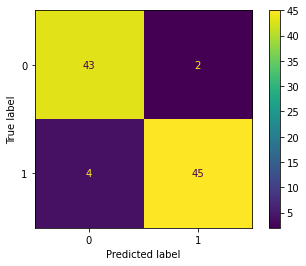

In [29]:
#Random Forest CM
from sklearn.metrics import ConfusionMatrixDisplay
foreg16 = RandomForestClassifier(max_depth = 31).fit(df_2016_train[xvars], df_2016_train[yvar])
ConfusionMatrixDisplay.from_predictions(df_2016_test[yvar], foreg16.predict(df_2016_test[xvars]))

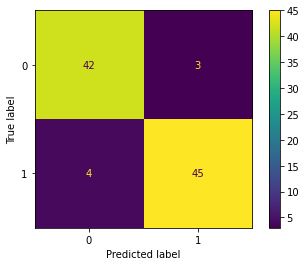

In [30]:
#Logit CM
logreg16 = LogisticRegression().fit(df_2016_train[xvars], df_2016_train[yvar])
ConfusionMatrixDisplay.from_predictions(df_2016_test[yvar], logreg16.predict(df_2016_test[xvars]))

# Supervised Learning to Predict Vote in 2020

In [32]:
df_2020[yvar].describe()

count    2203.000000
mean        0.674989
std         0.468485
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: vote, dtype: float64

In [33]:
#Model Selection Tests- Returns Accuracy Scores
forest_scores20 = cross_val_score(
    estimator = RandomForestClassifier(),
    X = df_2020[xvars],
    y = df_2020[yvar],
    cv = 10)

logit_scores20 = cross_val_score(
    estimator = LogisticRegression(),
    X = df_2020[xvars],
    y = df_2020[yvar],
    cv = 10)

print("RF Scores: " + str(forest_scores20.mean()))
print("Logit Scores: " + str(logit_scores20.mean()))

RF Scores: 0.9650329082682022
Logit Scores: 0.9663944878650762


In [34]:
#hyperparameter optimization
def scores_calc_depth20(depth):
    rand_for_score = cross_val_score(
        estimator = RandomForestClassifier(max_depth = depth),
        X = df_2020[xvars],
        y = df_2020[yvar],
        cv = 10)
    return rand_for_score.mean()

all_scores20 = [scores_calc_depth20(depth) for depth in range(1,60)]
all_scores20


[0.9650390785684904,
 0.9645824763471822,
 0.9650390785684904,
 0.9654895104895106,
 0.964578362813657,
 0.9645783628136568,
 0.9627622377622377,
 0.9641238173591115,
 0.9659358288770052,
 0.9668428630193336,
 0.9650267379679143,
 0.9659358288770055,
 0.967297408473879,
 0.964578362813657,
 0.9659358288770052,
 0.9663883175647883,
 0.9663903743315506,
 0.9641238173591115,
 0.964125874125874,
 0.9641238173591115,
 0.9654792266556971,
 0.9645783628136568,
 0.9654792266556971,
 0.964125874125874,
 0.9650308515014396,
 0.9654812834224599,
 0.9663903743315508,
 0.9636692719045659,
 0.9650329082682024,
 0.964578362813657,
 0.9668428630193336,
 0.9641238173591115,
 0.966388317564788,
 0.9650329082682024,
 0.966394487865076,
 0.965937885643768,
 0.9663883175647883,
 0.9659358288770055,
 0.9650308515014396,
 0.9636672151378033,
 0.9654812834224599,
 0.9663883175647883,
 0.9645804195804196,
 0.9668428630193334,
 0.9650329082682024,
 0.9650308515014396,
 0.9668428630193336,
 0.9654833401892224,
 

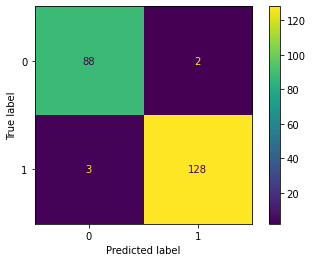

In [35]:
#Random Forest CM
from sklearn.metrics import ConfusionMatrixDisplay
foreg20 = RandomForestClassifier(max_depth = 31).fit(df_2020_train[xvars], df_2020_train[yvar])
ConfusionMatrixDisplay.from_predictions(df_2020_test[yvar], foreg20.predict(df_2020_test[xvars]))

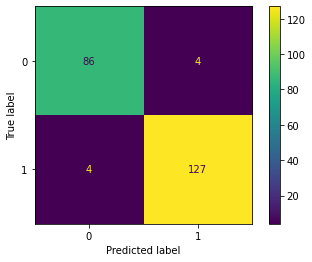

In [36]:
#Logit CM
logreg20 = LogisticRegression().fit(df_2020_train[xvars], df_2020_train[yvar])
ConfusionMatrixDisplay.from_predictions(df_2020_test[yvar], logreg20.predict(df_2020_test[xvars]))

Each matrix is comprised of two axes- one for predicted values and one for the true values of who someone voted for. In both cases, a value of 0 indicates the respondent voted for Donald Trump to become president, whereas a value of 1 indicates the respondent voted for the democratic candidate, Hillary Clinton in 2016 and Joe Biden in 2020. The number in each quadrant of the matrix indicates how many observations fall into that category based on who the model predicted they would vote for and who they voted for. The upper left-hand corners and lower right-hand corners of each chart contain far more observations than the other two, indicating that when the model predicts 1 or 0, far more often than not this prediction is correct. 

# Seeing how the predictions compare over time

### Tried to use the same model

As we are interested in determining the way voter patterns in the United States change over time, we move to assess whether or not the model which was estimated based on 2016 data can be used to predict outcomes of the 2020 election. This is made possible by both surveys containing the same or similar questions, and Donald Trump being coded as 0 in both cases. If the 2016 model fails to accurately predict 2020 voter outcomes, it may be the case that voter preferences or attitudes have changed significantly over the course of the Trump presidency (although there are some limitations of this method, which are explained shortly). We use the model that was estimated for 2016 to make predictions using data from 2020, and receive the following confusion matrix as a result: 

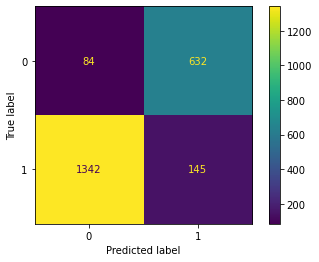

In [37]:
#RF CM
foreg_cross = RandomForestClassifier(max_depth = 31).fit(df_2016[xvars], df_2016[yvar])
ConfusionMatrixDisplay.from_predictions(df_2020[yvar], foreg_cross.predict(df_2020[xvars]))

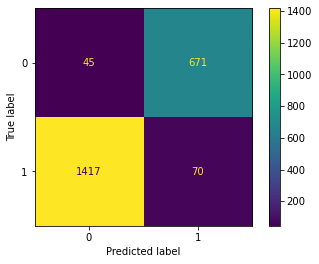

In [38]:
#Logit CM
logreg_cross = LogisticRegression().fit(df_2016[xvars], df_2016[yvar])
ConfusionMatrixDisplay.from_predictions(df_2020[yvar], logreg_cross.predict(df_2020[xvars]))

As shown in figures 7 and 8, the model performs extremely poorly. In fact, the model performs suspiciously poorly, almost predicting the opposite outcomes for every case. After noticing this almost perfect prediction of the opposite outcome, we review the features of the initial 2016 model. The approval rating variable questions were asked in a way that aims to gauge how voters evaluated the “president’s handling” of X. Since the party of the president switched (from Barack Obama to Donald Trump) in 2016, it is extremely likely that those who did approve of the president’s actions in 2016 no longer did so in 2020, and these confusion matrices serve as strong evidence behind this intuition. Thus, we move to select different features from the data which we don’t expect to diametrically change from 2016 to 2020. In the case of our second attempt at fitting a model to 2016 voters, we selected opinion questions which gauge voter’s attitudes toward immigration policy, party identification, free trade, and government health insurance offerings. We also use feeling thermometers for both liberals and conservatives as features. 

### Looking at the issue using different variables

In [39]:
xvars_cross = [
    "FTlib",
    "FTcon",
    "immigration",
    "partyid",
    "free_trade",
    "health_ins",
    "immigration"]

yvar_cross = "vote"

In [40]:
#hyperparameter optimization
def scores_calc_depth_cross(depth):
    rand_for_score = cross_val_score(
        estimator = RandomForestClassifier(max_depth = depth),
        X = df_2016[xvars_cross],
        y = df_2016[yvar_cross],
        cv = 10)
    return rand_for_score.mean()

all_scores_cross = [scores_calc_depth_cross(depth) for depth in range(1,60)]
all_scores_cross


[0.8826584305650881,
 0.8997597803706245,
 0.899736902310684,
 0.9018988789750629,
 0.8955044612216885,
 0.9008236101578586,
 0.9018760009151222,
 0.8955044612216885,
 0.8965682910089224,
 0.8944406314344542,
 0.8987073896133608,
 0.8869823838938459,
 0.8933653626172499,
 0.890173873255548,
 0.8880462136810798,
 0.8933768016472202,
 0.8880462136810798,
 0.8901853122855181,
 0.890173873255548,
 0.894429192404484,
 0.8955044612216885,
 0.8955044612216883,
 0.8912377030427818,
 0.886993822923816,
 0.889121482498284,
 0.8901624342255776,
 0.890173873255548,
 0.889121482498284,
 0.8923015328300158,
 0.8933768016472202,
 0.8912377030427819,
 0.89336536261725,
 0.889121482498284,
 0.8923244108899565,
 0.8880462136810798,
 0.8880347746511095,
 0.8912605811027225,
 0.8912377030427819,
 0.8933768016472202,
 0.8891329215282544,
 0.8933882406771904,
 0.8880576527110501,
 0.890173873255548,
 0.8880576527110501,
 0.8912491420727522,
 0.8923244108899565,
 0.8923129718599861,
 0.8955273392816288,
 0.8

0.9133000453926464


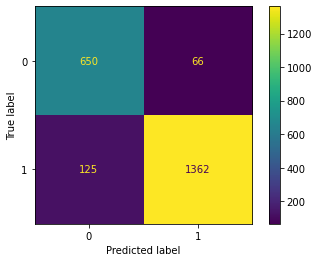

In [41]:
#Forrest CM
foreg_cross2 = RandomForestClassifier().fit(df_2016[xvars_cross], df_2016[yvar_cross])
ConfusionMatrixDisplay.from_predictions(df_2020[yvar_cross], foreg_cross2.predict(df_2020[xvars_cross]))
cross_prediction_accuracy = foreg_cross2.score(df_2020[xvars_cross], df_2020[yvar_cross])
print(cross_prediction_accuracy)

Both of the new models do a much better job than the previous estimates, with accuracy scores of 98.3% and 99.6% for 2020 and 2016 respectively. This may be an indication that the features we chose to represent voter outcomes in this second round of estimates were superior predictors of who an individual decided to vote for. Figure 11 shows the confusion matrix for the 2016 model’s ability to predict 2020 voter outcomes. As can be seen, the model still predicts fairly well, with an accuracy score of around 91%. However, the same model in the same country with the same questionnaire was not able to predict quite as accurately as it did four years prior. There may be several reasons for this. First, it may be the case that the way in which public opinion determines voter outcomes has changed. 

### Sanity Check

0.9836586472991375


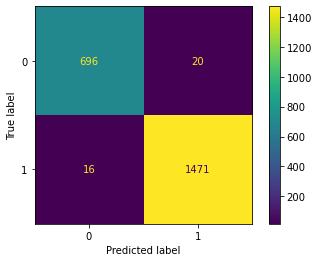

In [42]:
#For SANITY CHECK
foreg_cross_sanity20 = RandomForestClassifier().fit(df_2020[xvars_cross], df_2020[yvar_cross])
ConfusionMatrixDisplay.from_predictions(df_2020[yvar_cross], foreg_cross_sanity20.predict(df_2020[xvars_cross]))
cross_2016_accuracy = foreg_cross_sanity20.score(df_2020[xvars_cross], df_2020[yvar_cross])
print(cross_2016_accuracy)


0.9968017057569296


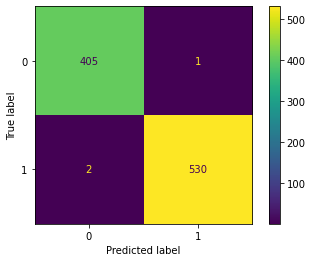

In [43]:
#For SANITY CHECK
foreg_cross_sanity16 = RandomForestClassifier().fit(df_2016[xvars_cross], df_2016[yvar_cross])
ConfusionMatrixDisplay.from_predictions(df_2016[yvar_cross], foreg_cross_sanity16.predict(df_2016[xvars_cross]))
cross_2020_accuracy = foreg_cross_sanity16.score(df_2016[xvars_cross], df_2016[yvar_cross])
print(cross_2020_accuracy)


It may be the case that the way in which public opinion determines voter outcomes has changed- in other words, there is some characteristic of Donald Trump, the Republican Party, the Democratic Party, or the Democratic candidates which changed over the course of the Trump presidency. However, there are some limitations of our analysis with the supervised learning model in being able to justify this claim. For instance, due to time-inconsistency, it may be the case that there is some serial collinearity between election cycles which would lead to variance that is not captured or explained in our model. It also may be the case that some methodological change on the survey level can explain this variability. Imprecise wording or changes in survey question order may impact the way the voters interpret the questions, or feel as they answer the survey, which would change how we expect the data to predict future elections. A broader time-series study of these changes in electoral predictability across several election cycles may be an opportunity for future research to better address our question. 